In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight


from keras.layers import Activation, Dense, Dropout







from tensorflow.keras.models import Sequential








df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [28]:
df = df.drop(columns = ['GenHlth', 'MentHlth','PhysHlth','Income','Education'])
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'Age'],
      dtype='object')

In [53]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  DiffWalk              253680 non-null  float64
 15  

In [45]:
y = df['HeartDiseaseorAttack'].values
X = df.drop(columns='HeartDiseaseorAttack', axis=1).values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:

# Calculate class weights which could be used in training
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [65]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(Dense(units=128, activation = "relu", input_dim= len(X_train[0])))
nn.add(Dropout(0.5))

# Second hidden layer
nn.add(Dense(units=64, activation = "relu"))
nn.add(Dropout(0.5))
# Third hidden layer
nn.add(Dense(32, activation="relu"))
nn.add(Dropout(0.5))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [66]:
nn.compile(loss="binary_crossentropy", optimizer= "adam", metrics= ["accuracy"])

In [67]:
# Implementing early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [68]:
nn_fitted = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, class_weight=class_weights, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
5708/5708 [==============================] - 7s 1ms/step - loss: 0.5403 - accuracy: 0.6886 - val_loss: 0.5026 - val_accuracy: 0.7005
Epoch 2/100
5708/5708 [==============================] - 6s 1ms/step - loss: 0.5218 - accuracy: 0.7015 - val_loss: 0.5100 - val_accuracy: 0.7110
Epoch 3/100
5708/5708 [==============================] - 7s 1ms/step - loss: 0.5194 - accuracy: 0.7090 - val_loss: 0.5008 - val_accuracy: 0.7175
Epoch 4/100
5708/5708 [==============================] - 7s 1ms/step - loss: 0.5177 - accuracy: 0.7109 - val_loss: 0.4670 - val_accuracy: 0.7299
Epoch 5/100
5708/5708 [==============================] - 7s 1ms/step - loss: 0.5175 - accuracy: 0.7133 - val_loss: 0.5535 - val_accuracy: 0.6844
Epoch 6/100
5708/5708 [==============================] - 7s 1ms/step - loss: 0.5179 - accuracy: 0.7168 - val_loss: 0.4794 - val_accuracy: 0.7132
Epoch 7/100
5708/5708 [==============================] - 7s 1ms/step - loss: 0.5171 - accuracy: 0.7170 - val_loss: 0.4707 - val_ac

In [36]:
nn_fitted = nn.fit(X_train_scaled,y_train, epochs=150,batch_size=32)

Epoch 1/150
6342/6342 [==============================] - 6s 858us/step - loss: 0.2486 - accuracy: 0.9065
Epoch 2/150
6342/6342 [==============================] - 6s 871us/step - loss: 0.2455 - accuracy: 0.9069
Epoch 3/150
6342/6342 [==============================] - 5s 788us/step - loss: 0.2449 - accuracy: 0.9068
Epoch 4/150
6342/6342 [==============================] - 5s 794us/step - loss: 0.2444 - accuracy: 0.9071
Epoch 5/150
6342/6342 [==============================] - 5s 790us/step - loss: 0.2443 - accuracy: 0.9074
Epoch 6/150
6342/6342 [==============================] - 5s 766us/step - loss: 0.2441 - accuracy: 0.9073
Epoch 7/150
6342/6342 [==============================] - 5s 776us/step - loss: 0.2438 - accuracy: 0.9072
Epoch 8/150
6342/6342 [==============================] - 5s 788us/step - loss: 0.2436 - accuracy: 0.9073
Epoch 9/150
6342/6342 [==============================] - 5s 766us/step - loss: 0.2435 - accuracy: 0.9073
Epoch 10/150
6342/6342 [==============================]

In [69]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1586/1586 - 1s - loss: 0.4669 - accuracy: 0.7328 - 858ms/epoch - 541us/step
Loss: 0.466871976852417, Accuracy: 0.7327932715415955


In [91]:
nn.save("./Models/Heart_Disease_Pred.h5")

# TESTING THE MODEL

In [70]:
# Predicting the probabilities of the positive class for the ROC-AUC score
y_pred_probs = nn.predict(X_test_scaled)

# Predicting class labels for the confusion matrix, precision, recall, and F1-score
y_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")

1586/1586 [==============================] - 1s 534us/step


In [71]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[33390 12578]
 [  979  3789]]


In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[45248   720]
 [ 4186   582]]


In [72]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


Precision: 0.23


In [73]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))


Recall: 0.79


In [74]:
# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score: {:.2f}".format(f1))


F1-Score: 0.36


In [75]:

# ROC-AUC Score
# Ensure y_pred_probs are the probabilities of the positive class (class 1)
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

ROC-AUC Score: 0.84


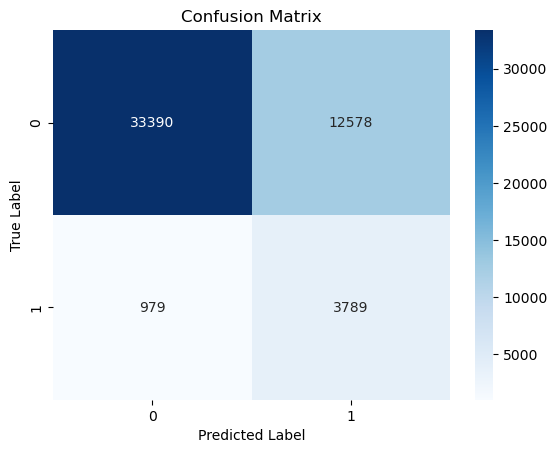

In [84]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Reloading Model and Predicting

In [85]:
reloded_Heart_Disease_Pred = keras.models.load_model("Heart_Disease_Pred.h5")

In [86]:
new_data = [[1, 0, 1, 30,
       0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0,33]]

In [87]:
new_data_df = pd.DataFrame(new_data, columns=['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex','Age'])
new_data_scaled = scaler.transform(new_data_df)

/home/arnold/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [88]:
prediction = reloded_Heart_Disease_Pred.predict(new_data_scaled)

1/1 [==============================] - 0s 30ms/step


In [89]:
print(f"prediction: {prediction}")

prediction: [[0.9224643]]
